<h1>--- Done ---</h1>

In [2]:
import pandas as pd
import os

- ### View data

In [3]:
df = pd.read_csv("../data/twitter_data.csv")
df.shape

D:\Dropbox\Academics\Master (Msc)\MSC AI\Sem 2\Machine Learning\Assignment\Mini Project\SubjectSentimentModelling\env\lib\site-packages\IPython\core\interactiveshell.py:3398: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(45549, 36)

In [4]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1548324974062055425,1548324974062055425,2022-07-16 23:13:34 Malay Peninsula Standard Time,2022-07-16,23:13:34,800,913885380725891072,lukechudoba,Luke Chudoba,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1548324934325133313,1548320272813395971,2022-07-16 23:13:25 Malay Peninsula Standard Time,2022-07-16,23:13:25,800,3087806261,0xmamba_eth,0xmamba.eth,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'NFTLlama', 'name': 'NFTLlama...",NaN,NaN,NaN,NaN
2,1548324912061825024,1548006028570009602,2022-07-16 23:13:20 Malay Peninsula Standard Time,2022-07-16,23:13:20,800,1087031566654676997,kickboxincorpse,Fuck Pineapple Pizza,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Benjjjyy', 'name': 'Benj', '...",NaN,NaN,NaN,NaN
3,1548324808466714627,1548006028570009602,2022-07-16 23:12:55 Malay Peninsula Standard Time,2022-07-16,23:12:55,800,1087031566654676997,kickboxincorpse,Fuck Pineapple Pizza,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Benjjjyy', 'name': 'Benj', '...",NaN,NaN,NaN,NaN
4,1548324303053107202,1548028742387130368,2022-07-16 23:10:54 Malay Peninsula Standard Time,2022-07-16,23:10:54,800,829762358172086273,insomniass_,🇺🇦♏︎•.𝕧𝕚𝕝𝕝𝕖𝕞 𝕡𝕠𝕨𝕖𝕣𝕫𝕖𝕟𝕜𝕠.•♏︎🇵🇸,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'StacyCaySlays', 'name': 'St ...",NaN,NaN,NaN,NaN


- ### Select relevant attributes

In [7]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [8]:
df[['tweet', 'language', 'translate']]

,tweet,language,translate
0,anong masarap sa pizza yung may pineapple o wala?,tl,NaN
1,@coir_twt pineapple pizza is amazing. Thanks f...,en,NaN
2,@neojayz pineapples on pizza is bad,en,NaN
3,the only good take mike had this season was pi...,en,NaN
4,"Leave pineapple on pizza,have you tried pineap...",en,NaN
...,...,...,...
27692,Pineapple on pizza or https://t.co/Iy9HZnmSIO,en,NaN
27693,just ordered dominos. you guys want any of my ...,en,NaN
27694,@Trisha__rc @xiuyouya I would like to apologiz...,en,NaN
27695,@Mitch_not_Bill @NewSounddbeats @DSPC_nft @jar...,en,NaN


In [9]:
df['translate'].unique()

array([nan])

In [10]:
df['language'].unique()

array(['tl', 'en', 'nl', 'fi', 'und', 'qme', 'es', 'ja', 'fa', 'sv', 'it',
       'de', 'et', 'in', 'fr', 'zh', 'tr', 'pt', 'ar', 'cs', 'ro', 'zxx',
       'no', 'qst', 'qam', 'ht', 'da', 'pl', 'cy', 'ko', 'art', 'lv',
       'is', 'qht', 'hi'], dtype=object)

In [11]:
df.groupby(by=['language'])['language'].count().sort_values(ascending=False)

language
en     26586
tl       277
ja       212
it        91
sv        80
und       69
qme       58
et        54
de        40
es        38
fa        35
in        32
pt        20
fr        17
zxx       12
nl        11
ko         7
qam        7
tr         6
fi         6
ar         5
zh         5
da         4
cs         4
no         3
pl         3
ht         3
qst        3
is         2
ro         2
cy         1
hi         1
lv         1
art        1
qht        1
Name: language, dtype: int64

In [12]:
df_en = df[df['language'] == 'en'][['tweet']]
print(df_en.shape)
df_en.head()

(26586, 1)


,tweet
1,@coir_twt pineapple pizza is amazing. Thanks f...
2,@neojayz pineapples on pizza is bad
3,the only good take mike had this season was pi...
4,"Leave pineapple on pizza,have you tried pineap..."
5,Pineapple on account of Pizza.


In [229]:
df_explore_en = df_en.copy()

- ### Select relevant tweet

In [230]:
import re

In [231]:
df_explore_en.shape

(26586, 1)

In [232]:
# tweet with pizza & pineapple

df_explore_en[df_explore_en['tweet'].apply(lambda x: True if re.search(r'pineapple[s]?.*pizza[s]?|pizza[s]?.*pineapple[s]?', x.lower()) else False)]

,tweet
1,@coir_twt pineapple pizza is amazing. Thanks f...
2,@neojayz pineapples on pizza is bad
3,the only good take mike had this season was pi...
4,"Leave pineapple on pizza,have you tried pineap..."
5,Pineapple on account of Pizza.
...,...
27691,@0xd51 @NFTBurn32 @safemoon_solid He’s shootin...
27692,Pineapple on pizza or https://t.co/Iy9HZnmSIO
27693,just ordered dominos. you guys want any of my ...
27695,@Mitch_not_Bill @NewSounddbeats @DSPC_nft @jar...


In [233]:
# tweet with no pizza or pineapple

df_temp = df_explore_en[df_explore_en['tweet'].apply(lambda x: False if re.search(r'pineapple[s]?.*pizza[s]?|pizza[s]?.*pineapple[s]?', x.lower()) else True)]
df_temp

,tweet
12,I be looking at the hot sign at Krispy Kreme t...
13,@fuslie @Valkyrae Maybe Rae can get her reveng...
40,@kebdyd @itsraechill True but I meant for call...
56,@InfiDale3476 @JamesWe23103648 the patsy
64,@lynchk8e @freshwaterpurl @JaneotN Little bit ...
...,...
27645,@nikxleaf Congratulations!!
27648,"@karaavaldez Good night, sweet dreams!! ♡"
27661,@eruhimeGA Stay safe and take care of yourself...
27664,"@keq1ng_ Hii, I am sorry for your loss :( rip!..."


In [234]:
df_temp.iloc[0]['tweet']

'I be looking at the hot sign at Krispy Kreme the same way Will be looking at Mike 🤣 #StrangerThings'

In [235]:
df_temp.iloc[5]['tweet']

'@wahl_kathaleen @freshwaterpurl I think the correct term here is *rape*, because someone having sex with an 10/11 year old is breaking the law. No sane person would doubt that-an 10 or 11 year old is coercible. The sex of said 10/11 year old is irrelevant. Break that habit'

- ### data exploration

In [236]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hariz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

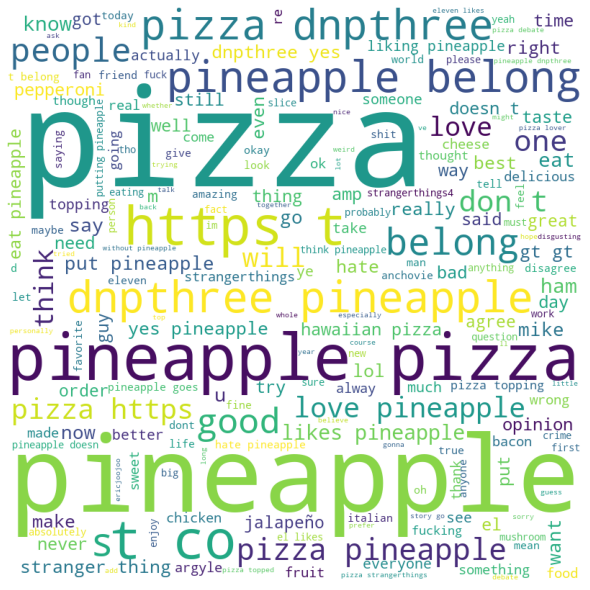

In [237]:
# show wordcloud for the text

from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = ''
for i, tdf in df_explore_en.iterrows():
    words += ' ' + tdf['tweet'].lower()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [238]:
# show the word count dict

from collections import defaultdict

word_counter = defaultdict(lambda: 0)
for i, tdf in df_explore_en.iterrows():
    tokenize_word = word_tokenize(tdf['tweet'])
    for w in tokenize_word:
        word_counter[w] += 1
{k: v for k, v in sorted(word_counter.items(), key=lambda x: x[1], reverse=True)}

{'@': 24042,
 'pizza': 23501,
 'on': 18234,
 'pineapple': 17536,
 '.': 15600,
 ',': 9978,
 'I': 9477,
 'the': 7758,
 'is': 6982,
 'a': 6974,
 '!': 6373,
 'and': 6229,
 'Pineapple': 6022,
 'to': 5470,
 'it': 5335,
 '’': 4726,
 '?': 4702,
 'you': 4209,
 'DNPthree': 4140,
 ':': 4041,
 'like': 3627,
 'of': 3510,
 'with': 3501,
 'that': 3170,
 'not': 2881,
 'in': 2819,
 'https': 2682,
 '#': 2646,
 'for': 2589,
 'but': 2574,
 'my': 2424,
 'Pizza': 2297,
 "n't": 2226,
 "'s": 2003,
 'i': 1992,
 'do': 1874,
 'belongs': 1733,
 't': 1732,
 'be': 1666,
 'me': 1655,
 'have': 1593,
 's': 1542,
 'belong': 1496,
 'good': 1482,
 'so': 1464,
 'this': 1432,
 'are': 1421,
 'or': 1401,
 'pineapples': 1371,
 'does': 1322,
 ';': 1318,
 'just': 1271,
 'love': 1263,
 'if': 1233,
 'was': 1198,
 '&': 1194,
 'can': 1154,
 'about': 1132,
 'no': 1116,
 'PIZZA': 1051,
 ')': 1038,
 'your': 1021,
 'people': 1008,
 'as': 1003,
 'all': 985,
 '...': 951,
 'PINEAPPLE': 946,
 '(': 932,
 'eat': 901,
 'It': 877,
 'who': 849,

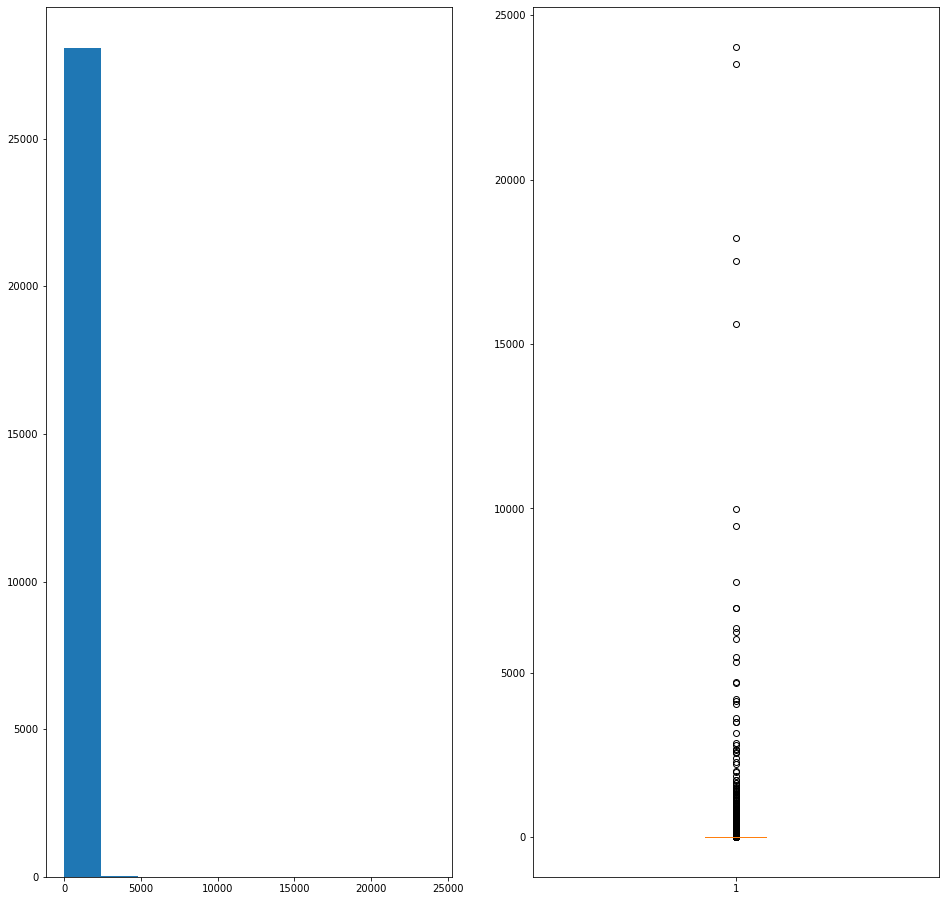

In [239]:
# show the word count distribution

fig, axe = plt.subplots(figsize=(16, 16), nrows=1, ncols=2)
axe[0].hist([v for k, v in word_counter.items()], bins=10);
axe[1].boxplot([v for k, v in word_counter.items()]);

- ### vader prediction

In [240]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [241]:
vaderPredict = SentimentIntensityAnalyzer()

#### - vader performed very well on noisy data

In [242]:
vaderPredict.polarity_scores('🤔')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [243]:
vaderPredict.polarity_scores('🥰')

{'neg': 0.0, 'neu': 0.291, 'pos': 0.709, 'compound': 0.8074}

In [244]:
vaderPredict.polarity_scores('#happy')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}

In [245]:
vaderPredict.polarity_scores('#happygolucky')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [246]:
vaderPredict.polarity_scores('yummy')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267}

In [247]:
vaderPredict.polarity_scores('yummy!')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5707}

In [248]:
vaderPredict.polarity_scores('yummy!!!')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6458}

In [249]:
# we dont think there is a need to do cleaning, because Vader is performing very well on raw data
# it even assign value to some of the emoji & hashtag

In [284]:
# create basic filtering

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stp = set(stopwords.words('english'))
pst = PorterStemmer()

def cleaning_text(txt):
    txt = txt.lower()
    txt = re.sub(r'@\w*', 'USER', txt) # replaced user tagged with another obj
    txt = re.sub(r"(.)\1\1+", r"\1\1", txt) # replaced 3 or more sequences to 2 sequences
    txt = re.sub(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)", '', txt) # removing url
    txt = re.sub(r'#\w*\s+', '', txt) # removing hashtag
    txt = re.sub(r'[^a-zA-Z0-9]', ' ', txt) # removing symbol and punctuation and other noise
    txt = ' '.join([pst.stem(x) for x in txt.split(' ')]) # stemming
    txt = ' '.join([x for x in txt.split(' ') if x not in stp]) # removing stopwords
    
    return txt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hariz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
# for the sake of simplicity and discrepancy, we are only going to compare positive and negative

cleaned data
label
neg     4361
pos    22225
Name: label, dtype: int64

raw data
label
neg     5627
pos    20959
Name: label, dtype: int64


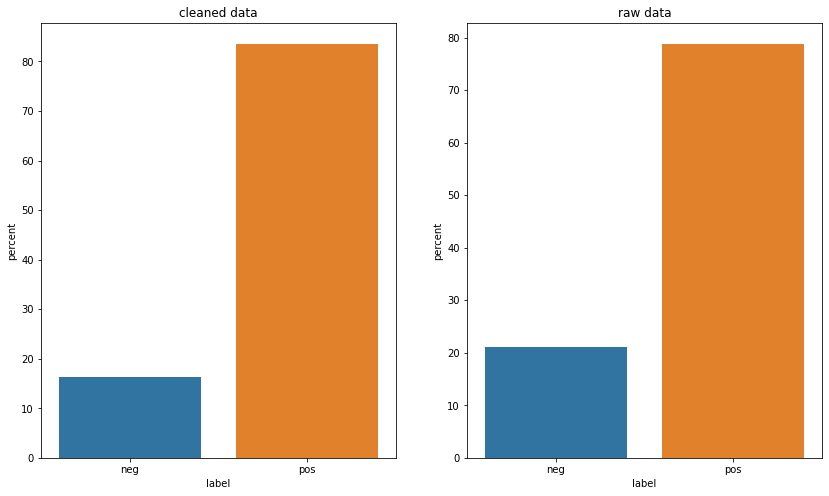

In [285]:
# compare the result between cleaning and raw

import seaborn as sns

df_explore_en_clean = df_explore_en.copy()
df_explore_en_clean['tweet'] = df_explore_en_clean['tweet'].apply(lambda x: cleaning_text(x))
df_explore_en_raw = df_explore_en.copy()

df_explore_en_clean['label'] = df_explore_en_clean['tweet'].apply(lambda x: 
            'pos' if vaderPredict.polarity_scores(x)['compound'] >= 0 else 'neg')
df_explore_en_raw['label'] = df_explore_en_raw['tweet'].apply(lambda x: 
            'pos' if vaderPredict.polarity_scores(x)['compound'] >= 0 else 'neg')

print('cleaned data')
print(df_explore_en_clean.groupby(by=['label'])['label'].count())
print('\nraw data')
print(df_explore_en_raw.groupby(by=['label'])['label'].count())

fig, axe = plt.subplots(figsize=(14, 8), nrows=1, ncols=2)

tdf1 = df_explore_en_clean.groupby(by=['label'], as_index=False).count()
tdf1['percent'] = (tdf1['tweet'] / tdf1['tweet'].sum()) * 100
sns.barplot(data=tdf1, x='label', y='percent', ax=axe[0]);
axe[0].set_title('cleaned data')

tdf2 = df_explore_en_raw.groupby(by=['label'], as_index=False).count()
tdf2['percent'] = (tdf2['tweet'] / tdf2['tweet'].sum()) * 100
sns.barplot(data=tdf2, x='label', y='percent', ax=axe[1]);
axe[1].set_title('raw data')

plt.show()

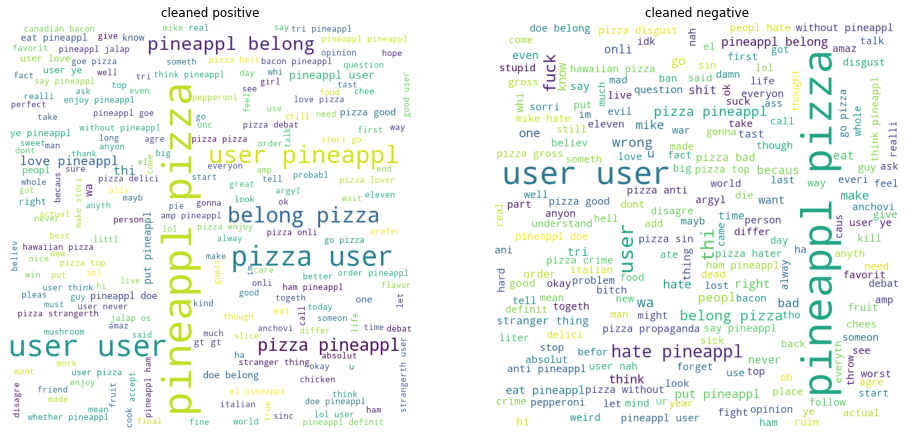

In [286]:
# word cloud for both of the label on cleaned data

from wordcloud import WordCloud
import matplotlib.pyplot as plt

stp = set(stopwords.words('english'))

wordspos = ''
for i, tdf in df_explore_en_clean[df_explore_en_clean['label'] == 'pos'].iterrows():
    wordspos += ' ' + tdf['tweet'].lower()

wordcloudpos = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(wordspos)

wordsneg = ''
for i, tdf in df_explore_en_clean[df_explore_en_clean['label'] == 'neg'].iterrows():
    wordsneg += ' ' + tdf['tweet'].lower()

wordcloudneg = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(wordsneg)

fig, axe = plt.subplots(figsize=(16, 8), nrows=1, ncols=2, facecolor = None)

axe[0].imshow(wordcloudpos)
axe[0].axis("off")
axe[0].set_title("cleaned positive")

axe[1].imshow(wordcloudneg)
axe[1].axis("off")
axe[1].set_title("cleaned negative")
 
plt.show()

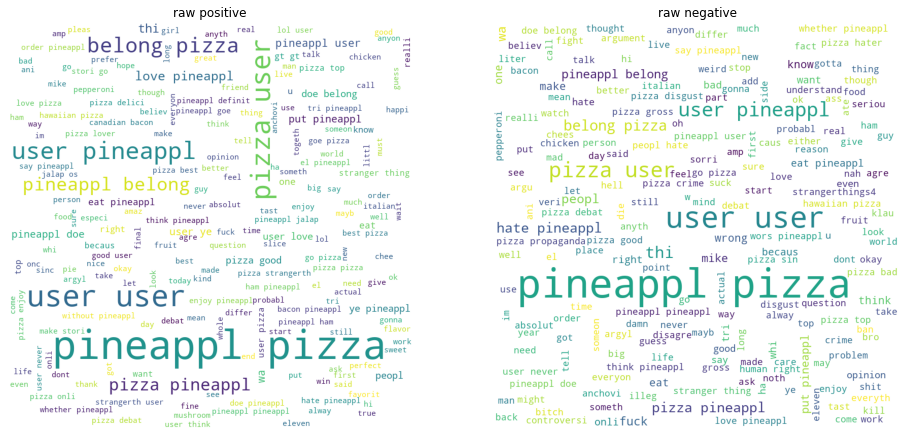

In [287]:
# word cloud for both of the label on raw data

from wordcloud import WordCloud
import matplotlib.pyplot as plt

stp = set(stopwords.words('english'))

wordspos = ''
for i, tdf in df_explore_en_clean[df_explore_en_raw['label'] == 'pos'].iterrows():
    wordspos += ' ' + tdf['tweet'].lower()

wordcloudpos = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(wordspos)

wordsneg = ''
for i, tdf in df_explore_en_clean[df_explore_en_raw['label'] == 'neg'].iterrows():
    wordsneg += ' ' + tdf['tweet'].lower()

wordcloudneg = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(wordsneg)

fig, axe = plt.subplots(figsize=(16, 8), nrows=1, ncols=2, facecolor = None)

axe[0].imshow(wordcloudpos)
axe[0].axis("off")
axe[0].set_title("raw positive")

axe[1].imshow(wordcloudneg)
axe[1].axis("off")
axe[1].set_title("raw negative")
 
plt.show()

In [288]:
# since vader is performed very well on noisy data, we are going to label the raw version
# but for ml, we are going to clean it

- ### result of data cleaning

In [289]:
# show the comparison on the top-20 word count between before and after cleaning

from collections import defaultdict

word_counter = defaultdict(lambda: 0)
for i, tdf in df_explore_en_clean.iterrows():
    tokenize_word = word_tokenize(tdf['tweet'])
    for w in tokenize_word:
        word_counter[w] += 1
        
print("cleaned data")
{item[0]: item[1] for i, item in enumerate({k: v for k, v in sorted(word_counter.items(), key=lambda x: x[1], reverse=True)}.items()) if i < 20}

cleaned data


{'pizza': 27484,
 'pineappl': 26507,
 'user': 24036,
 'like': 4966,
 'belong': 3413,
 'thi': 1856,
 'love': 1725,
 'good': 1681,
 'eat': 1306,
 'doe': 1253,
 'peopl': 1192,
 'put': 1189,
 'wa': 1173,
 'go': 1122,
 'thing': 1114,
 'ye': 1111,
 'tri': 959,
 'think': 891,
 'one': 885,
 'top': 860}

In [290]:
word_counter = defaultdict(lambda: 0)
for i, tdf in df_explore_en_raw.iterrows():
    tokenize_word = word_tokenize(tdf['tweet'])
    for w in tokenize_word:
        word_counter[w] += 1
        
print("raw data")
{item[0]: item[1] for i, item in enumerate({k: v for k, v in sorted(word_counter.items(), key=lambda x: x[1], reverse=True)}.items()) if i < 20}

raw data


{'@': 24042,
 'pizza': 23501,
 'on': 18234,
 'pineapple': 17536,
 '.': 15600,
 ',': 9978,
 'I': 9477,
 'the': 7758,
 'is': 6982,
 'a': 6974,
 '!': 6373,
 'and': 6229,
 'Pineapple': 6022,
 'to': 5470,
 'it': 5335,
 '’': 4726,
 '?': 4702,
 'you': 4209,
 'DNPthree': 4140,
 ':': 4041}

In [291]:
# show the comparison for the available vocab

vocab = set()
for i, tdf in df_explore_en_clean.iterrows():
    vocab = vocab.union({x for x in word_tokenize(tdf['tweet'])})
    
print("cleaned data")
len(vocab)

cleaned data


9486

In [292]:
vocab = set()
for i, tdf in df_explore_en_raw.iterrows():
    vocab = vocab.union({x for x in word_tokenize(tdf['tweet'])})
    
print("raw data")
len(vocab)

raw data


28083

- ### do data cleaning on raw for ml

In [295]:
# create basic filtering

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stp = set(stopwords.words('english'))
pst = PorterStemmer()

def cleaning_text(txt):
    txt = txt.lower()
    txt = re.sub(r'@\w*', 'USER', txt) # replaced user tagged with another obj
    txt = re.sub(r"(.)\1\1+", r"\1\1", txt) # replaced 3 or more sequences to 2 sequences
    txt = re.sub(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)", '', txt) # removing url
    txt = re.sub(r'#\w*\s+', '', txt) # removing hashtag
    txt = re.sub(r'[^a-zA-Z0-9]', ' ', txt) # removing symbol and punctuation and other noise
    txt = ' '.join([pst.stem(x) for x in txt.split(' ')]) # stemming
    txt = ' '.join([x for x in txt.split(' ') if x not in stp]) # removing stopwords
    
    return txt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hariz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [299]:
dataml = df_explore_en_raw.copy()
dataml['cleaned_tweet'] = dataml['tweet'].apply(lambda x: cleaning_text(x))
dataml.tail()

,tweet,label,cleaned_tweet
27692,Pineapple on pizza or https://t.co/Iy9HZnmSIO,pos,pineappl pizza
27693,just ordered dominos. you guys want any of my ...,pos,order domino guy want ani pineappl pizza
27694,@Trisha__rc @xiuyouya I would like to apologiz...,neg,user user would like apolog sorri rude behavi...
27695,@Mitch_not_Bill @NewSounddbeats @DSPC_nft @jar...,pos,user user user user user think still releas pi...
27696,@SpaceAddictsNFT Get #rekt… not even a #degen ...,pos,user get rekt even eat pineappl pizza rede...


- ### split data

In [298]:
from sklearn.model_selection import train_test_split, cross_val_score

In [315]:
X_train, X_test, y_train, y_test = train_test_split(dataml['cleaned_tweet'], dataml['label'], test_size=0.1, random_state=2)
print("train size: {}".format(len(X_train)))
print("test size: {}".format(len(X_test)))

train size: 23927
test size: 2659


In [362]:
# save the index & result for comparison purpose in the later section

test_compare = pd.DataFrame()
test_compare['index'] = X_test.index
test_compare['label'] = y_test.values

- ### get the tfidf to be fit as ml variables

In [316]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [317]:
vectoriser = TfidfVectorizer(ngram_range=(1,2))
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  67177


D:\Dropbox\Project\LegitProject\ProductSentimentModelling\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [318]:
X_train_tf = vectoriser.transform(X_train)
X_test_tf = vectoriser.transform(X_test)

- ### create ml model & evaluate

In [324]:
# create util function for easy model evaluation

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test_tf)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [330]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np 

              precision    recall  f1-score   support

         neg       0.71      0.13      0.22       556
         pos       0.81      0.99      0.89      2103

    accuracy                           0.81      2659
   macro avg       0.76      0.56      0.55      2659
weighted avg       0.79      0.81      0.75      2659



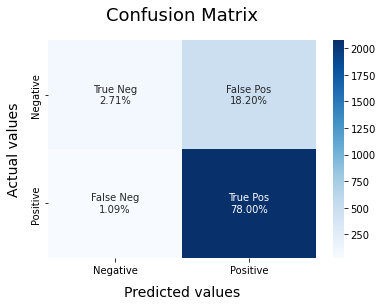

In [331]:
# test out naive bayes model

BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train_tf, y_train)
model_Evaluate(BNBmodel)

In [334]:
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

         neg       0.91      0.53      0.67       556
         pos       0.89      0.99      0.93      2103

    accuracy                           0.89      2659
   macro avg       0.90      0.76      0.80      2659
weighted avg       0.89      0.89      0.88      2659



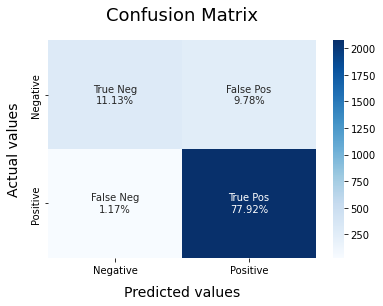

In [335]:
# test out logistic regression model

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_tf, y_train)
model_Evaluate(LRmodel)

In [336]:
from sklearn.neural_network import MLPClassifier

              precision    recall  f1-score   support

         neg       0.89      0.85      0.87       556
         pos       0.96      0.97      0.97      2103

    accuracy                           0.95      2659
   macro avg       0.92      0.91      0.92      2659
weighted avg       0.94      0.95      0.94      2659



D:\Dropbox\Project\LegitProject\ProductSentimentModelling\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


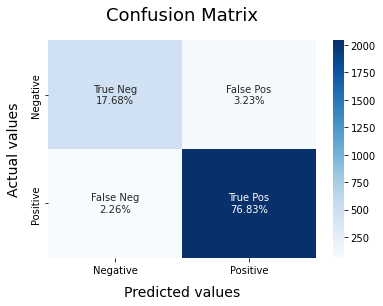

In [349]:
# test out perceptron model

clf = MLPClassifier(solver='lbfgs', alpha=0.00005, hidden_layer_sizes=(5, 3), random_state=1)
clf.fit(X_train_tf, y_train)
model_Evaluate(clf)

In [350]:
# we are going to take the perceptron model for comparison

- ### compare result with vader

In [366]:
# save the result

test_compare['predict'] = clf.predict(X_test_tf)
test_compare

,index,label,predict
0,21546,pos,pos
1,3161,pos,pos
2,7819,pos,pos
3,6108,neg,neg
4,18918,pos,pos
...,...,...,...
2654,13643,pos,pos
2655,21590,pos,pos
2656,1644,pos,pos
2657,5585,pos,pos


In [367]:
# un-matched index

test_compare[test_compare['label'] != test_compare['predict']]

,index,label,predict
14,23217,pos,neg
45,17429,neg,pos
55,26424,neg,pos
67,14477,pos,neg
74,11612,neg,pos
...,...,...,...
2564,24306,pos,neg
2567,26355,neg,pos
2625,11065,pos,neg
2628,24993,neg,pos


In [369]:
# false positive index

test_compare[(test_compare['label'] == 'neg') & (test_compare['predict'] == 'pos')]

,index,label,predict
45,17429,neg,pos
55,26424,neg,pos
74,11612,neg,pos
99,8348,neg,pos
134,10195,neg,pos
...,...,...,...
2547,22836,neg,pos
2563,4044,neg,pos
2567,26355,neg,pos
2628,24993,neg,pos


In [370]:
# false negative index

test_compare[(test_compare['label'] == 'pos') & (test_compare['predict'] == 'neg')]

,index,label,predict
14,23217,pos,neg
67,14477,pos,neg
82,23916,pos,neg
87,24346,pos,neg
118,3934,pos,neg
167,22403,pos,neg
373,25388,pos,neg
427,12079,pos,neg
505,26070,pos,neg
516,21968,pos,neg


In [386]:
# three sample for false positive

print(df_explore_en_raw.loc[22836, :].tweet)
print(df_explore_en_raw.loc[4044, :].tweet)
print(df_explore_en_raw.loc[26424, :].tweet)

@MOthinus Er...isnt pineapple pizza Hawaiian pizza? To me I prefer Hawaiian without sweet pineapple 😎
not el liking pineapple on pizza
@feeblephrog we'll make pineapple pizza there 😭


In [392]:
# three sample for false negative

print(df_explore_en_raw.loc[12079, :].tweet)
print(df_explore_en_raw.loc[25191, :].tweet)
print(df_explore_en_raw.loc[24585, :].tweet)

@DNPthree Of course put Pineapple on Pizza! I MISS U &amp; Wolfpack!  @DNPthree I hope all of the projects are doing well &amp; coming along! I hope the fam is great! I feel bad I can't be a part of the Gridcraft minting, staking etc but that's ok i'm holdin on to my 2 goobers forever!
@SparkyMarky1865 Nothing  wrang whi pineapple on a pizza
@michael79123592 You can never go wrong with pizza unless you ask for pineapple topping.  Just sayin....😇


##### therefore, there is not enough evidence of how vader is better than ml approach or vice versa. a more planned practice and experiments should be done for comparison. the ml-modelling also is fully dependent on the result of the vader itself.